In [ ]:
pip install --upgrade opencv-python

Requirement already up-to-date: opencv-python in /usr/local/lib/python3.7/dist-packages (4.5.1.48)


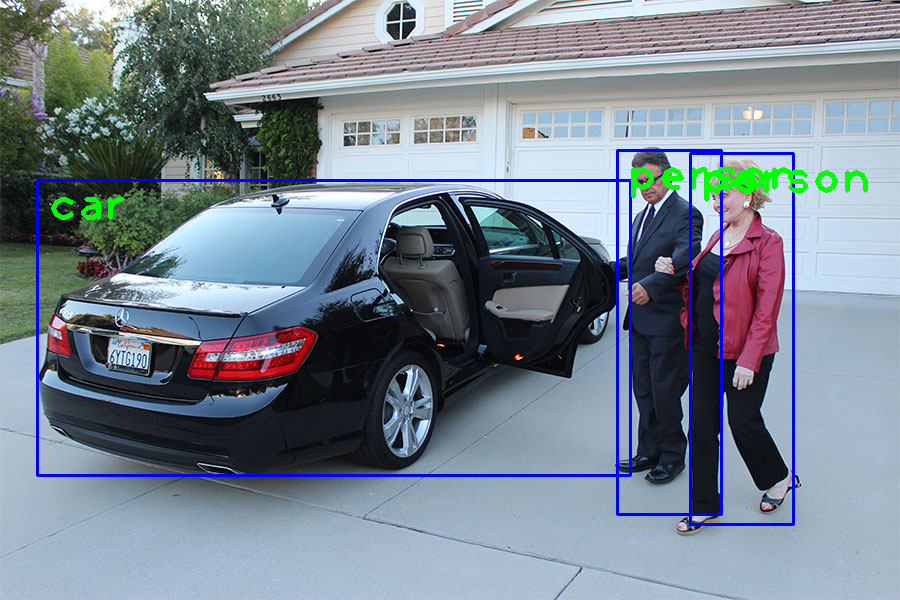

In [ ]:
# Finding Car and Pedestrians via Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

config_file = 'ssd_config.pbtxt'
frozen_model = 'frozen_model.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file) 
classLabels = []
file_name = 'label.txt'
with open(file_name, 'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

img = cv2.imread('i.jpg')
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0, 255, 0), thickness = 3)

cv2_imshow(img)

In [ ]:
# Finding Car and Pedestrians via Video
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow 
cap = cv2.VideoCapture("vid.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
  print("Cannot Open Video")


model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)  
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)    
    if(len(ClassIndex)!=0):
        for ClassIndex, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color =(255, 255, 255), thickness = 3)
    cv2_imshow(frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.